
# Introduction to Classification

Supervised learning is a type of machine learning where the model learns from labeled data. In this context, **classification** is a specific type of supervised learning where the goal is to predict a categorical label for new observations based on past data.

## Classification vs. Regression

Classification is distinct from regression, which predicts continuous values. In classification, the target variable $y$ is categorical, meaning it can take on a limited number of discrete values (e.g., "spam" or "not spam", "cat", "dog", or "weasel").

## Classification Types

Broadly, classification can be divided into two types:

-   **Binary Classification**: The target variable has two classes (e.g., "yes" or "no", "spam" or "not spam"). Numerically, this can always be represented as 0 and 1.
-   **Multiclass Classification**: The target variable has more than two classes (e.g., "cat", "dog", "weasel"). In this case, the model predicts one of several possible categories.

## Classification Algorithms

Classification algorithms are designed to learn from labeled data and make predictions about the class of new, unseen data. Some common algorithms include:

-   **Logistic Regression**: Despite its name, it is used for binary classification. It models the probability that a given input belongs to a particular class.
-   **k-Nearest Neighbors (k-NN)**: A non-parametric method that classifies a data point based on the classes of its nearest neighbors in the feature space.
-   **Decision Trees**: A tree-like model that splits the data into subsets based on feature values, leading to a decision about the class label.
-   **Support Vector Machines (SVM)**: A method that finds the hyperplane that best separates the classes in the feature space.
-   More advanced algorithms.

## Key Concepts

-   **Decision Boundaries**: The boundaries that separate different classes in the feature space. These boundaries are determined by the classification algorithm and can be linear or non-linear.
-   **Probability vs. Hard Classification**: Some algorithms output probabilities for each class (e.g., logistic regression), while others provide a hard classification (e.g., k-NN). The output can be class labels or probabilities, depending on the algorithm and the method used to make predictions.
-   **Output**: The output of a classification model can be either class labels (e.g., `predict()` in `scikit-learn`) or probabilities (e.g., `predict_proba()` in `scikit-learn`). The choice depends on the specific use case and the algorithm used.

## Practical Demonstration

In this section, we will demonstrate how to perform classification using the Iris dataset, a classic dataset in machine learning. The Iris dataset contains measurements of iris flowers and their species, making it suitable for both binary and multiclass classification tasks.

### Binary vs. Multiclass Classification

In the Iris dataset, we can perform both binary and multiclass classification. For binary classification we can consider only two species of iris flowers (e.g., "setosa" and "versicolor"), while for multiclass classification we can use all three species ("setosa", "versicolor", and "virginica").

-   Loading the Iris dataset and filter out the 'virginica' species

In [1]:
import pandas as pd

df = pd.read_csv("../../data/iris.csv", header=0)
df = df[df['species'] != 'virginica']

X = df.drop(columns=['species'])
y = df['species'].astype('category').cat.codes

-   Exploratory Data Analysis (EDA)

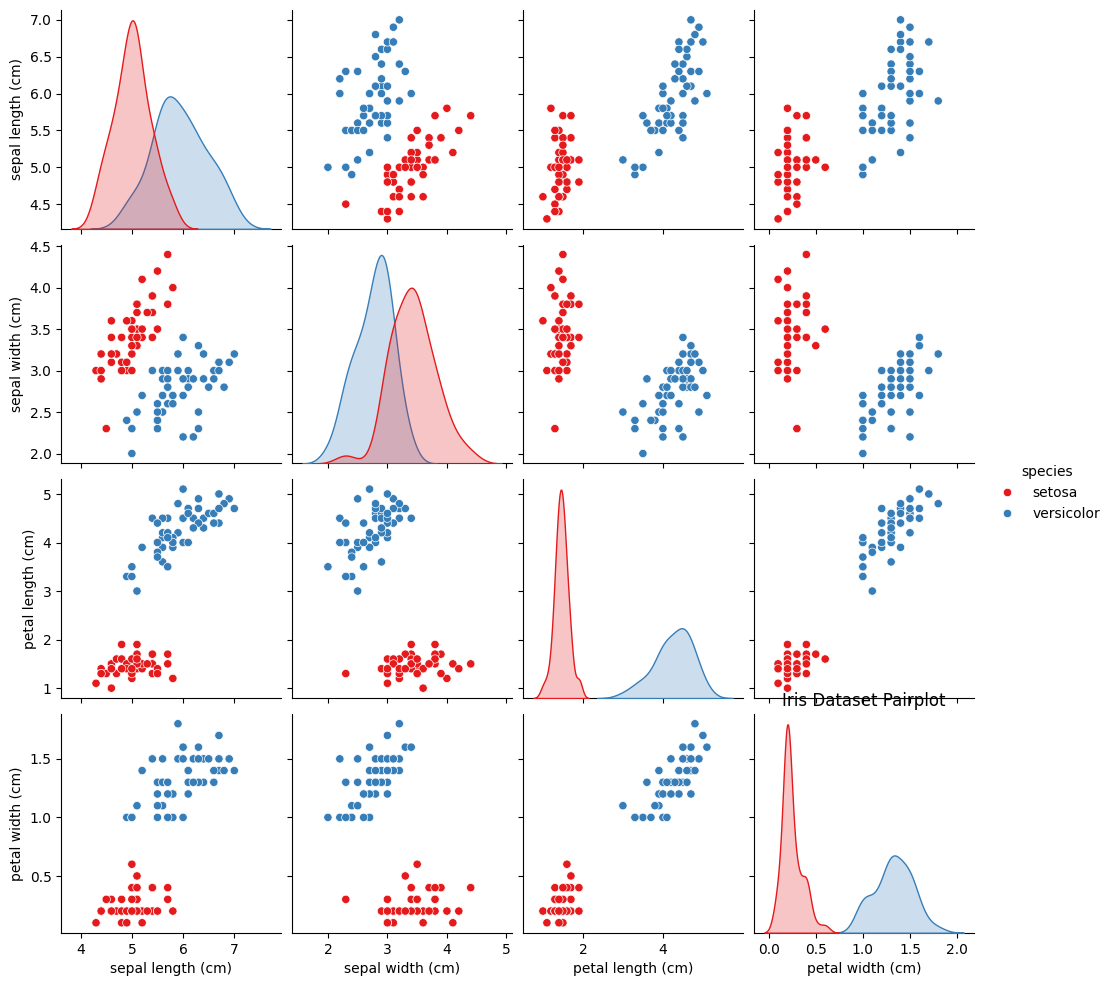

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the dataset
sns.pairplot(df, hue='species', palette='Set1')
plt.title("Iris Dataset Pairplot")
plt.show()

-   Preprocessing the data

In [3]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Encode categorical labels
y = df['species'].astype('category').cat.codes
print("Encoded labels:", y.unique())
# Features and target variable
X = df.drop(columns=['species'])
print("Feature columns:", X.columns.tolist())
print("Feature data types:", X.dtypes)

Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
Encoded labels: [0 1]
Feature columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature data types: sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object


-   Split the dataset into training and test sets

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 80
Test set size: 20


-   Train a Logistic Regression classifier

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Train a logistic regression model
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


-   Evaluate the model's accuracy

In [6]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Binary classification accuracy:", accuracy)

Binary classification accuracy: 1.0


-   Plot decision boundaries (2D) using only 2 features (e.g. `petal length`, `petal width`)

In [7]:
import numpy as np

# Select two features for visualization
X_vis = X[['petal length (cm)', 'petal width (cm)']]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

In [8]:
# Train the model on the selected features
clf_vis = LogisticRegression(max_iter=200)
clf_vis.fit(X_train_vis, y_train_vis)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


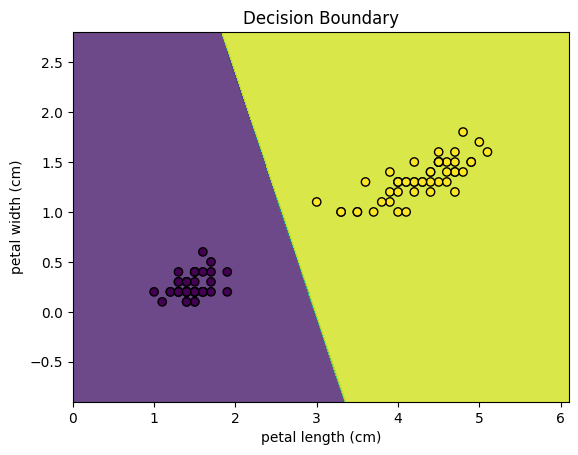

In [9]:
# Plot decision boundaries
from sklearn.inspection import DecisionBoundaryDisplay
display = DecisionBoundaryDisplay.from_estimator(
    estimator=clf_vis,
    X=X_vis,
    alpha=0.8,
    grid_resolution=500,
    response_method="predict",
)
display.ax_.scatter(
    df['petal length (cm)'], df['petal width (cm)'], c=df['species'].astype('category').cat.codes, edgecolor="black"
)
plt.title('Decision Boundary')
plt.show()

## Hands-on Exercises

Use the Iris dataset to perform multiclass classification. You will need to load the dataset again, since we've filtered out the 'virginica' species in the previous section.

-   Load the Iris dataset and perform multiclass classification using all three species.

In [19]:
df = pd.read_csv("../../data/iris.csv", header=0)

# Features and target variable
X_full = df.drop(columns=['species'])
y_full = df['species']
print("Feature columns:", X_full.columns.tolist())
print("Feature data types:", X_full.dtypes)
print("Encoded labels:", y_full.unique())

Feature columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature data types: sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object
Encoded labels: ['setosa' 'versicolor' 'virginica']


-   Exploratory Data Analysis (EDA).

In [20]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


<Figure size 1000x600 with 0 Axes>

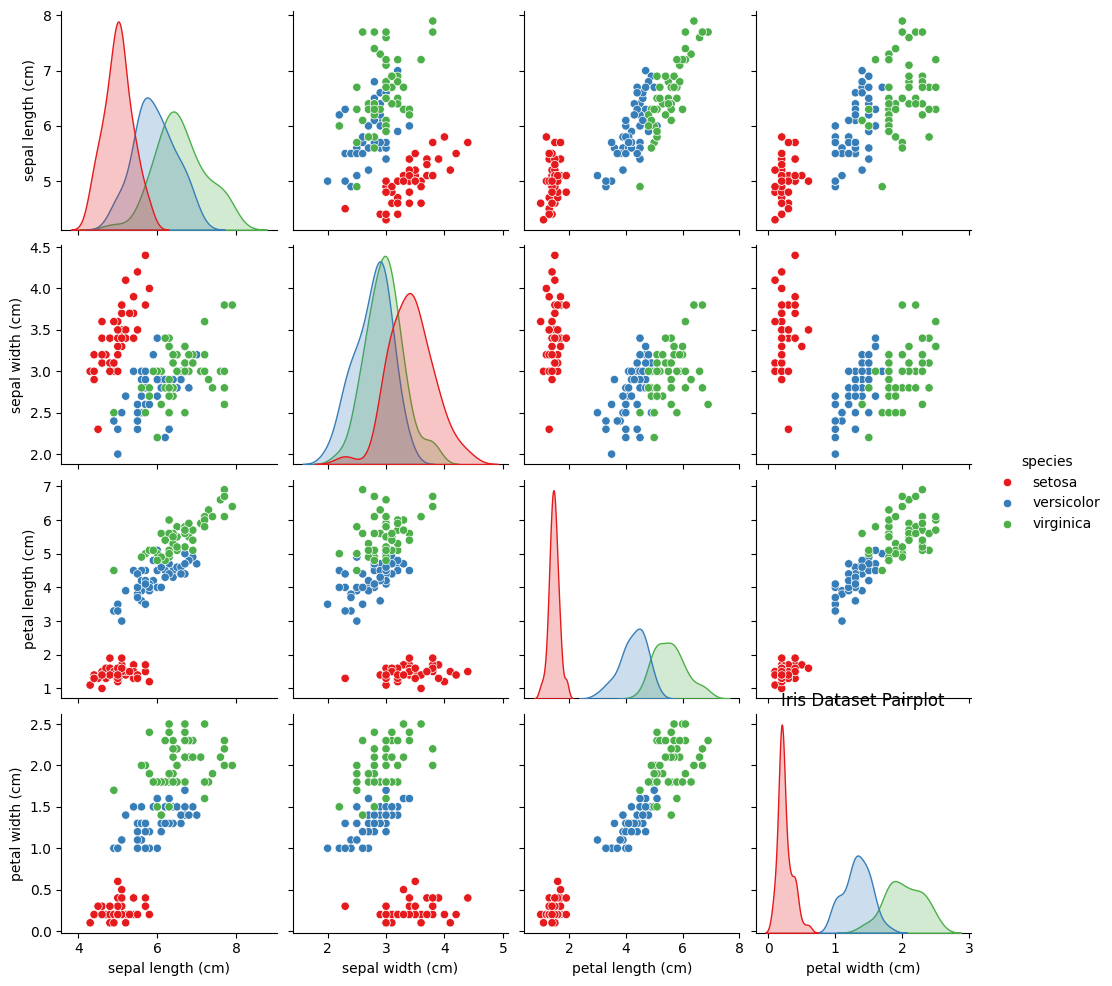

In [21]:
# Visualize the dataset
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='species', palette='Set1')
plt.title("Iris Dataset Pairplot")
plt.show()

-   Select two of the most relevant features.

In [22]:
X_full = X_full[['petal length (cm)', 'petal width (cm)', 'sepal length (cm)']]
print("Selected features for training:", X_full.columns.tolist())

Selected features for training: ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)']


-   Perform the train-test split.

In [23]:
from sklearn.model_selection import train_test_split
X_train_full, X_test_full, y_train_full, y_test_full = \
    train_test_split(X_full, y_full, test_size=0.2, random_state=42)

-   Train a logistic regression model for multiclass classification.

In [24]:
from sklearn.linear_model import LogisticRegression
clf_multiclass = LogisticRegression(max_iter=200, solver='lbfgs')
clf_multiclass.fit(X_train_full, y_train_full)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


-   Evaluate the model's accuracy.

In [25]:
# Make predictions on the test set
y_pred_full = clf_multiclass.predict(X_test_full)

# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score
accuracy_multiclass = accuracy_score(y_test_full, y_pred_full)
print("Multiclass classification accuracy:", accuracy_multiclass)
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_full, y_pred_full)
print("Confusion Matrix:\n", cm)

Multiclass classification accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


-   Plot decision boundaries (2D) using only the 2 features, `petal length` and `petal width`.

In [26]:
# Plot decision boundaries
from sklearn.inspection import DecisionBoundaryDisplay
display = DecisionBoundaryDisplay.from_estimator(
    estimator=clf_multiclass,
    X=X_test_full,
    alpha=0.8,
    grid_resolution=500,
    response_method="predict",
)
display.ax_.scatter(
    X_test_full['petal length (cm)'],
    X_test_full['petal width (cm)'],
    c=y_test_full.astype('category').cat.codes, edgecolor="black"
)
plt.title('Decision Boundary')
plt.show()

ValueError: n_features must be equal to 2. Got 3 instead.